In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


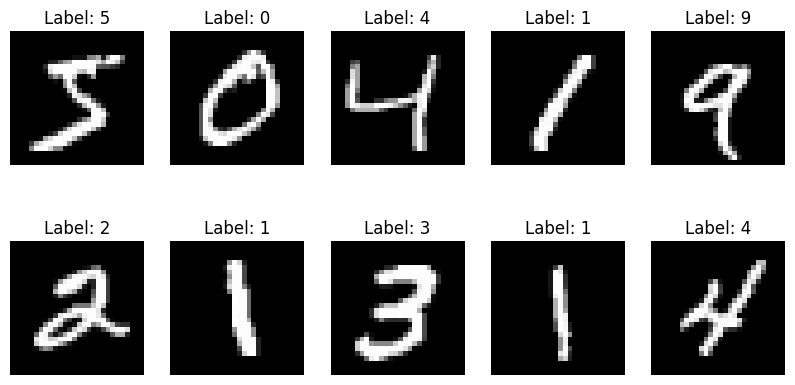

In [2]:
import matplotlib.pyplot as plt

# Plot some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


In [3]:
from tensorflow.keras import layers, models

def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_lenet_model()


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.8437 - loss: 0.5251 - val_accuracy: 0.9665 - val_loss: 0.1149
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9624 - loss: 0.1212 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9822 - val_loss: 0.0585
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9855 - val_loss: 0.0550
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9820 - val_loss: 0.0622


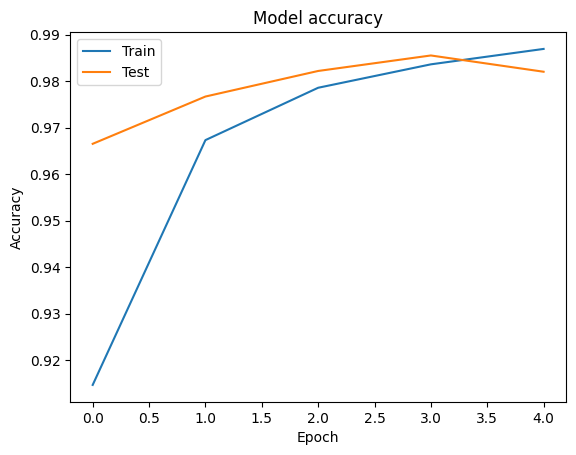

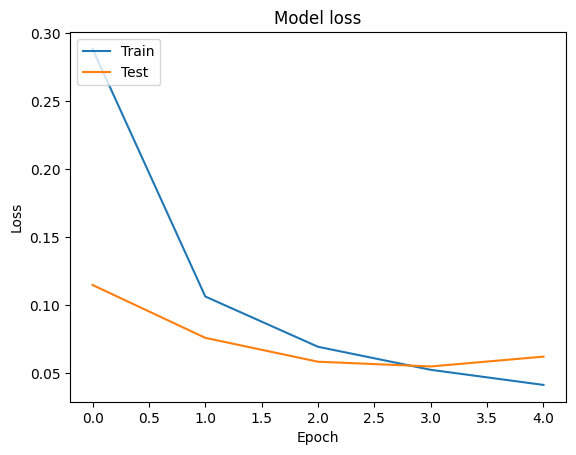

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9799 - loss: 0.0633
Test Loss: 0.054738037288188934
Test Accuracy: 0.9830999970436096


In [9]:
from tensorflow.keras.optimizers import Adam

def create_lenet_model_with_params(learning_rate=0.001, batch_size=64, num_neurons=84):
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_neurons, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = create_lenet_model_with_params(learning_rate=lr, batch_size=batch_size, num_neurons=num_neurons)
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.1, verbose=2)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)


Epoch 1/5
844/844 - 8s - 10ms/step - accuracy: 0.1003 - loss: 3.2862 - val_accuracy: 0.0952 - val_loss: 6.0685
Epoch 2/5
844/844 - 7s - 8ms/step - accuracy: 0.1021 - loss: 3.4966 - val_accuracy: 0.1113 - val_loss: 3.1019
Epoch 3/5
844/844 - 8s - 9ms/step - accuracy: 0.0988 - loss: 3.4484 - val_accuracy: 0.0952 - val_loss: 3.0823
Epoch 4/5
844/844 - 6s - 7ms/step - accuracy: 0.0996 - loss: 3.3766 - val_accuracy: 0.0995 - val_loss: 3.8535
Epoch 5/5
844/844 - 6s - 7ms/step - accuracy: 0.1000 - loss: 3.2505 - val_accuracy: 0.0952 - val_loss: 4.0298


In [10]:
from tensorflow.keras import regularizers

def create_lenet_model_with_dropout_and_l2(dropout_rate=0.5, l2_reg=0.01):
    model = models.Sequential()
    model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', padding='same', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(120, (5, 5), activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train with and without Dropout/L2
regularization_results = {}

# Without regularization
print("Training without regularization")
model_no_reg = create_lenet_model_with_params()
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
test_loss_no_reg, test_accuracy_no_reg = model_no_reg.evaluate(x_test, y_test, verbose=0)

# With Dropout and L2
print("Training with Dropout and L2 regularization")
model_reg = create_lenet_model_with_dropout_and_l2()
history_reg = model_reg.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
test_loss_reg, test_accuracy_reg = model_reg.evaluate(x_test, y_test, verbose=0)

regularization_results['no_regularization'] = (test_loss_no_reg, test_accuracy_no_reg)
regularization_results['with_regularization'] = (test_loss_reg, test_accuracy_reg)


Training without regularization
Epoch 1/5
844/844 - 7s - 8ms/step - accuracy: 0.9119 - loss: 0.2946 - val_accuracy: 0.9687 - val_loss: 0.1113
Epoch 2/5
844/844 - 7s - 8ms/step - accuracy: 0.9673 - loss: 0.1080 - val_accuracy: 0.9682 - val_loss: 0.1022
Epoch 3/5
844/844 - 8s - 10ms/step - accuracy: 0.9780 - loss: 0.0720 - val_accuracy: 0.9783 - val_loss: 0.0710
Epoch 4/5
844/844 - 6s - 8ms/step - accuracy: 0.9829 - loss: 0.0554 - val_accuracy: 0.9827 - val_loss: 0.0626
Epoch 5/5
844/844 - 6s - 7ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9827 - val_loss: 0.0614
Training with Dropout and L2 regularization
Epoch 1/5
844/844 - 7s - 8ms/step - accuracy: 0.8656 - loss: 0.8924 - val_accuracy: 0.9445 - val_loss: 0.4816
Epoch 2/5
844/844 - 7s - 8ms/step - accuracy: 0.9270 - loss: 0.5266 - val_accuracy: 0.9597 - val_loss: 0.4063
Epoch 3/5
844/844 - 7s - 8ms/step - accuracy: 0.9414 - loss: 0.4621 - val_accuracy: 0.9560 - val_loss: 0.4000
Epoch 4/5
844/844 - 6s - 8ms/step - accurac

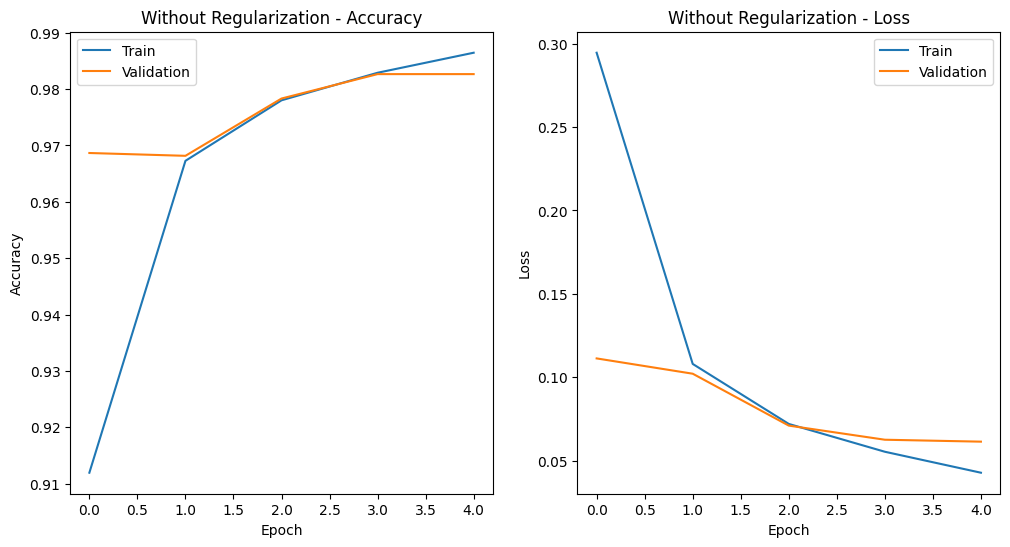

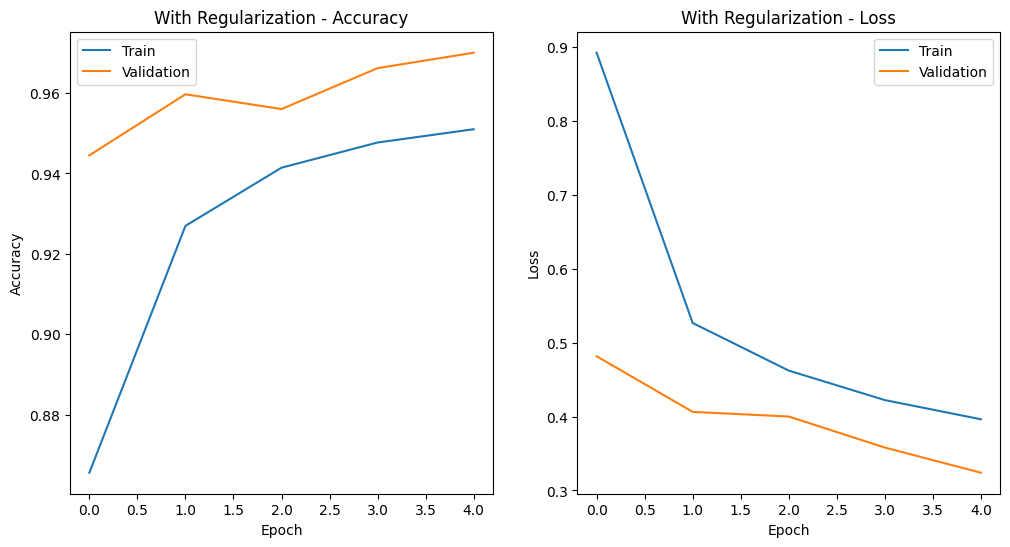

In [11]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_history(history_no_reg, 'Without Regularization')
plot_history(history_reg, 'With Regularization')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


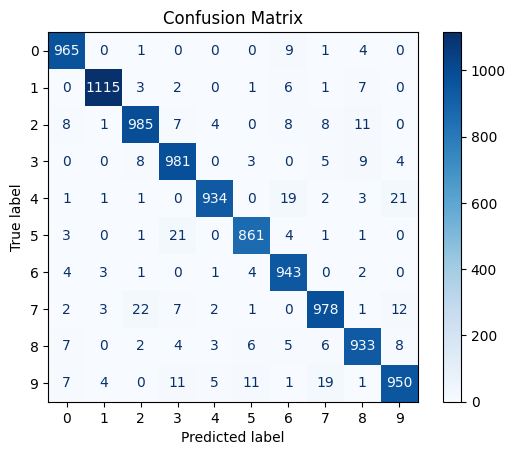

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = model_reg.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
